# Project 1

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
from environment import Environment
from agent       import Agent

In [3]:
NUM_ARMS  =      10
NUM_TESTS =     200
NUM_STEPS =  10_000

In [4]:
def run_simulation(envs, agents, update_mode=2):
    stats = np.zeros((NUM_STEPS, 2))
    for step in range(NUM_STEPS):
        for env, agent in zip(envs, agents):
            agent.pull_arm(env)
            
        stats[step, 0] = np.mean([ env.get_optimal_pulls_pct() for env in envs ])
        stats[step, 1] = np.mean([ env.get_average_reward()    for env in envs ])

        for env in envs:
            env.update(mode=update_mode)

    return stats

In [5]:
def show_stats(stats):
    # Plot the optimal arm percentage and average reward
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(stats[:, 0])
    plt.title('Optimal Arm Percentage')
    plt.xlabel('Step')
    plt.ylabel('Optimal Arm Percentage')
    plt.ylim(0, 100)
    
    plt.subplot(1, 2, 2)
    plt.plot(stats[:, 1])
    plt.title('Average Reward')
    plt.xlabel('Step')
    plt.ylabel('Average Reward')
    plt.show()

### Part 1

#### Testbed 1

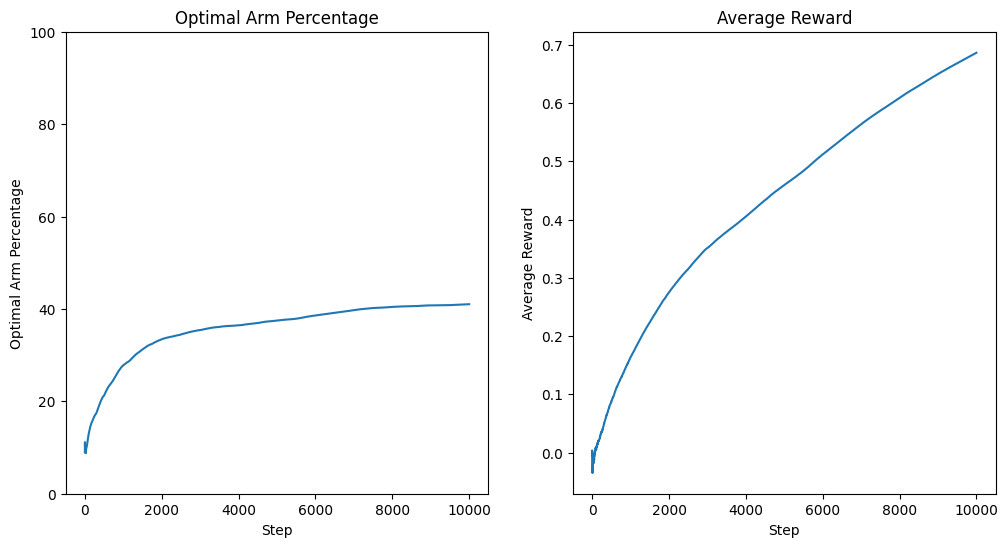

In [6]:
envs   = [ Environment(NUM_ARMS, mode=0) for _ in range(NUM_TESTS) ]
agents = [ Agent(NUM_ARMS, e=0.1, a=0)   for _ in range(NUM_TESTS) ]

stats_var_step = run_simulation(envs, agents)
show_stats(stats_var_step)

#### Testbed 2

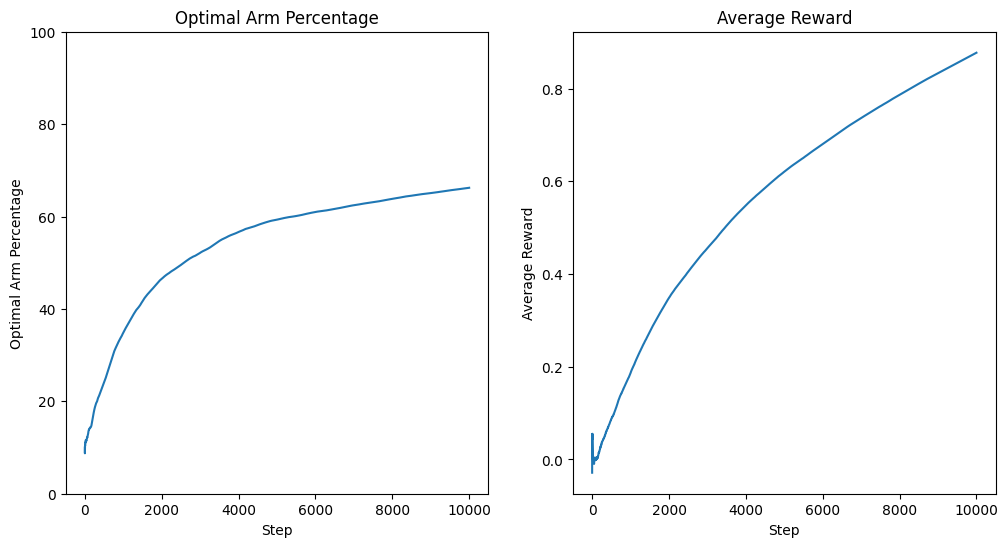

In [7]:
envs   = [ Environment(NUM_ARMS, mode=0) for _ in range(NUM_TESTS) ]
agents = [ Agent(NUM_ARMS, e=0.1, a=0.1) for _ in range(NUM_TESTS) ]

stats_con_step = run_simulation(envs, agents)
show_stats(stats_con_step)

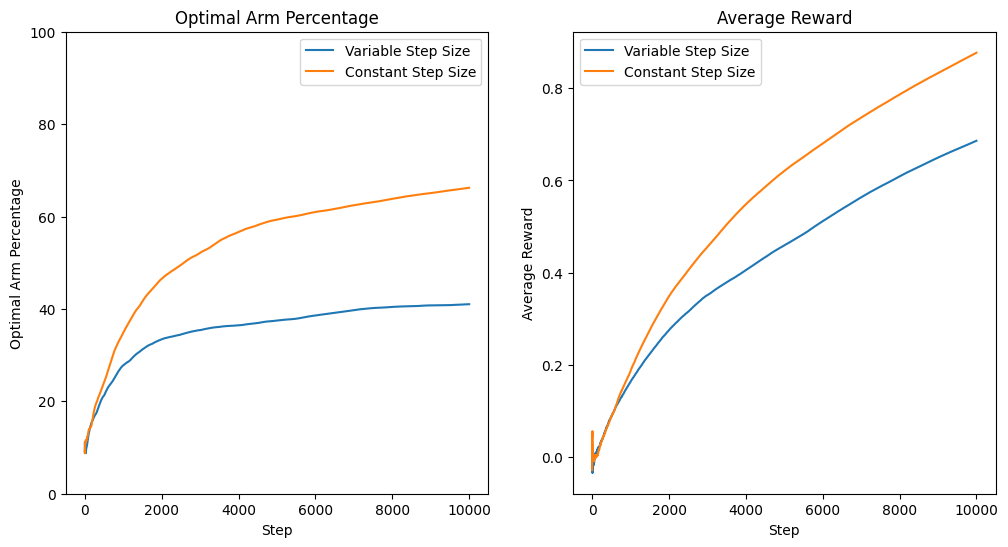

In [8]:
# Plot results for both experiments
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stats_var_step[:, 0], label='Variable Step Size')
plt.plot(stats_con_step[:, 0], label='Constant Step Size')
plt.title('Optimal Arm Percentage')
plt.xlabel('Step')
plt.ylabel('Optimal Arm Percentage')
plt.ylim(0, 100)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stats_var_step[:, 1], label='Variable Step Size')
plt.plot(stats_con_step[:, 1], label='Constant Step Size')
plt.title('Average Reward')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend()

plt.show()

### Part 2

#### Testbed 3

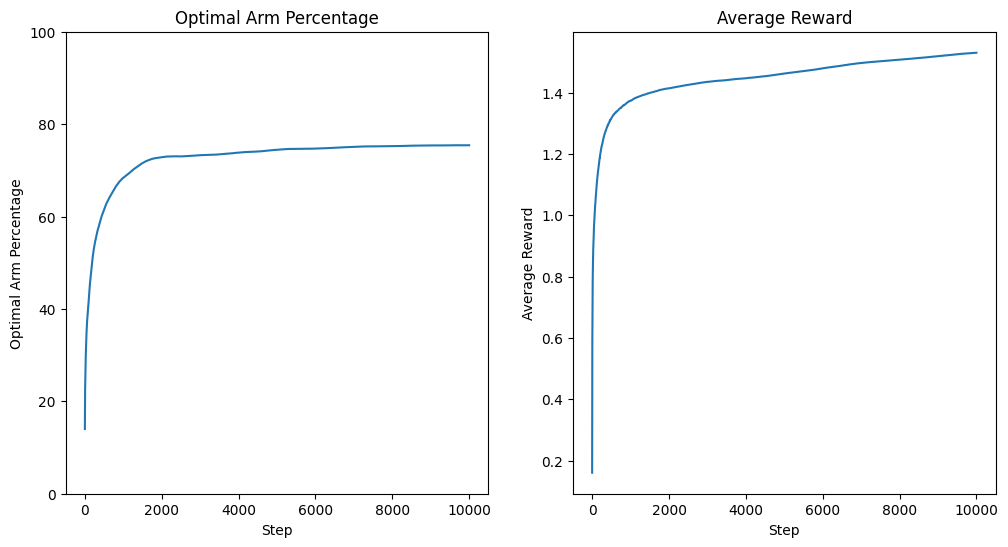

In [12]:
envs   = [ Environment(NUM_ARMS, mode=1) for _ in range(NUM_TESTS) ]
agents = [ Agent(NUM_ARMS, e=0.1, a=0)   for _ in range(NUM_TESTS) ]

stats_var_step_sing = run_simulation(envs, agents, update_mode=1)
show_stats(stats_var_step_sing)

#### Testbed 4

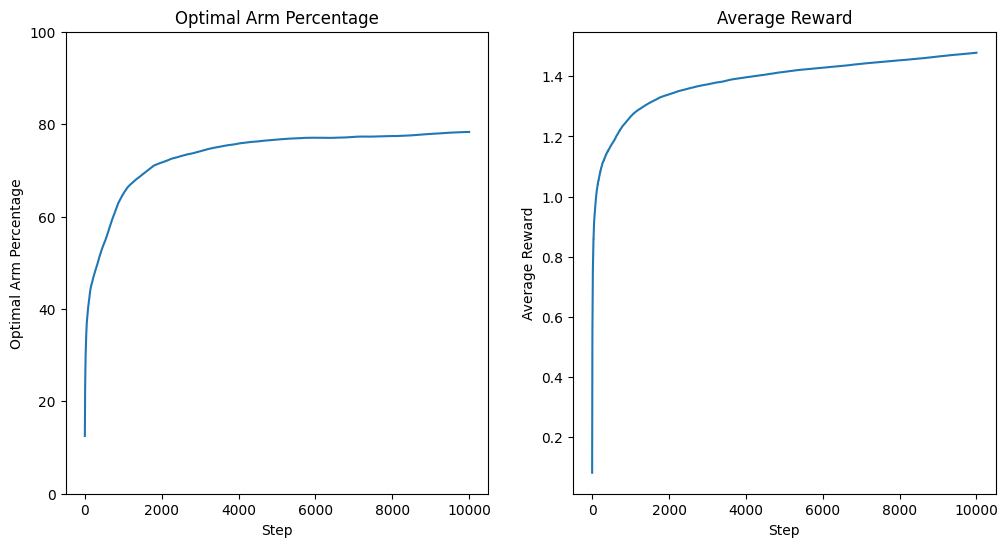

In [13]:
envs   = [ Environment(NUM_ARMS, mode=1) for _ in range(NUM_TESTS) ]
agents = [ Agent(NUM_ARMS, e=0.1, a=0.1) for _ in range(NUM_TESTS) ]

stats_con_step_sing = run_simulation(envs, agents, update_mode=1)
show_stats(stats_con_step_sing)

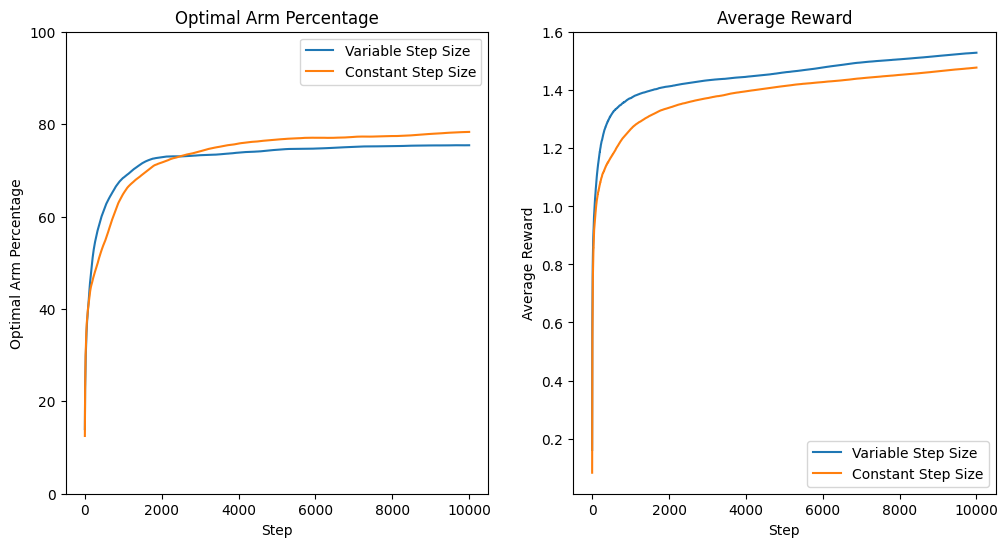

In [14]:
# Plot results for both experiments
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(stats_var_step_sing[:, 0], label='Variable Step Size')
plt.plot(stats_con_step_sing[:, 0], label='Constant Step Size')
plt.title('Optimal Arm Percentage')
plt.xlabel('Step')
plt.ylabel('Optimal Arm Percentage')
plt.ylim(0, 100)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(stats_var_step_sing[:, 1], label='Variable Step Size')
plt.plot(stats_con_step_sing[:, 1], label='Constant Step Size')
plt.title('Average Reward')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend()

plt.show()